In [175]:
import mvts_utils as mv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
num_samples_list = np.array([5, 6, 7, 8, 9, 10, 15, 20, 50, 100])
noise_list = np.array([0,.05,.1,.25,.5,.75,1,2.5,5,7.5,10])
times = np.arange(0,1000,.1)
n_splits = 3000

acc = np.empty((len(num_samples_list),len(noise_list),n_splits)) 
acc_df = pd.DataFrame()

for inoise,noise in enumerate(noise_list):

    x, y = mv.make_prepared_dataset(times, noise=noise)

    for isamp,num_samples in enumerate(num_samples_list):

        clf_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=100000, random_state=37))
        shuffle = mv.DownsampleStratifiedShuffleSplit(n_splits=n_splits,test_size=.2,num_samples=num_samples)

        scores = cross_val_score(clf_pipeline, x, y, cv=shuffle)
        acc[isamp, inoise] = scores
        acc_df = acc_df.append({'Accuracy': np.mean(scores), 'Noise': noise, 'Number of training samples': num_samples}, ignore_index=True)


In [195]:
acc_pivot = acc_df.pivot('Number of training samples', 'Noise', 'Accuracy')

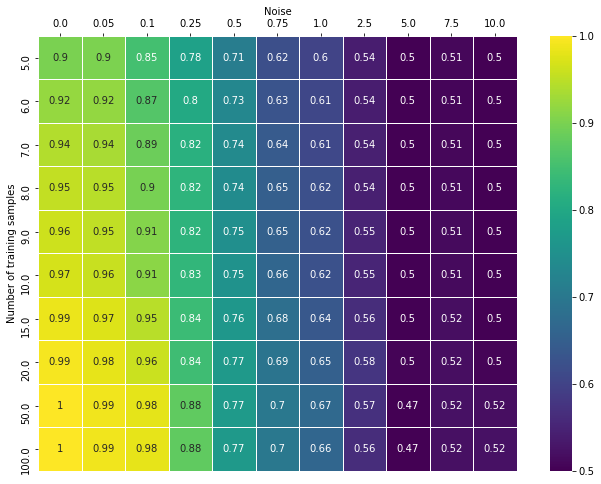

In [215]:
plt.subplots(figsize=(12,8))
ax = sns.heatmap(acc_pivot, annot=True, vmin=.5, vmax=1, cmap='viridis', square=True,linewidths=1)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')